# SML Algorithms on Dataset Augmented with SMOTE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import StackingClassifier
import os
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import pickle

# Load the training data


In [ ]:
X_train_loaded = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/SMOTE_AugmentedDataset/X_smote.csv')
y_train_loaded = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/SMOTE_AugmentedDataset/y_smote.csv')

In [ ]:
X_train_loaded

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,-1.402354,-1.216963,0.776593,-1.192455,0.393537
1,2,-0.352437,-0.542955,-1.142245,0.633308,-1.208953
2,2,0.247515,1.344270,-1.538284,2.087899,0.597776
3,1,-0.852397,-1.149563,-0.528663,0.382516,1.069096
4,1,1.947381,1.950878,-0.071265,0.252105,1.351888
...,...,...,...,...,...,...
47224,1,1.424549,0.489211,-0.444370,0.223130,1.711869
47225,1,0.557576,0.447906,-0.234672,-0.224406,1.541990
47226,2,-0.720689,-1.302806,-0.557215,-0.192009,1.428996
47227,2,-0.000540,0.932080,0.853558,-1.100722,1.700245


In [ ]:
y_train_loaded

,Reason of Failure
0,0
1,0
2,0
3,0
4,0
...,...
47224,6
47225,6
47226,6
47227,6


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_loaded, y_train_loaded, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (33060, 6)
X_test shape: (14169, 6)
y_train shape: (33060, 1)
y_test shape: (14169, 1)


## Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression()

In [ ]:
logistic_regression_model.fit(X_train, y_train.values.reshape(-1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_regression_model.predict(X_test)
y_pred_proba = logistic_regression_model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test.values.reshape(-1), y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9102265509210248


In [ ]:
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71      2083
           1       1.00      1.00      1.00      2003
           2       0.98      0.97      0.98      2019
           3       0.96      0.96      0.96      1997
           4       0.95      0.99      0.97      2044
           5       0.77      0.81      0.79      1967
           6       0.91      0.99      0.95      2056

    accuracy                           0.91     14169
   macro avg       0.91      0.91      0.91     14169
weighted avg       0.91      0.91      0.91     14169



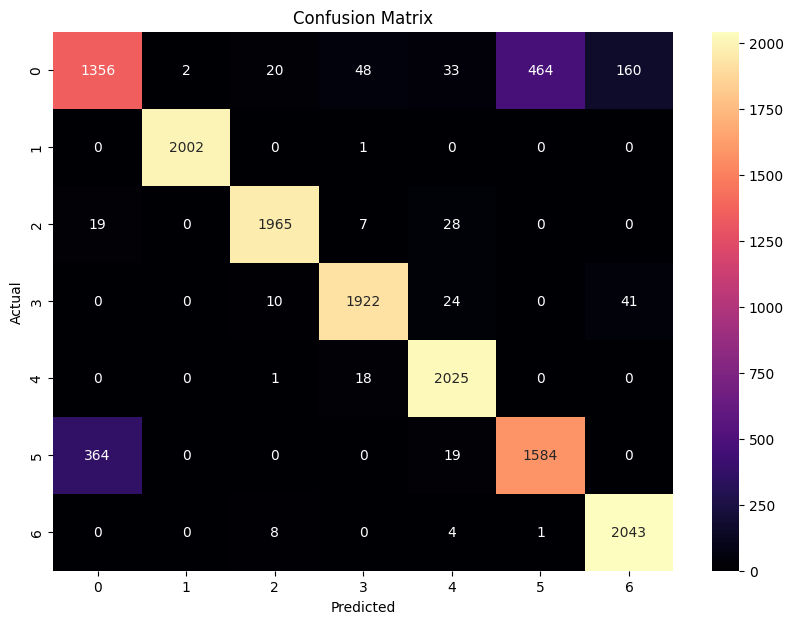

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_proba.shape

(14169, 7)

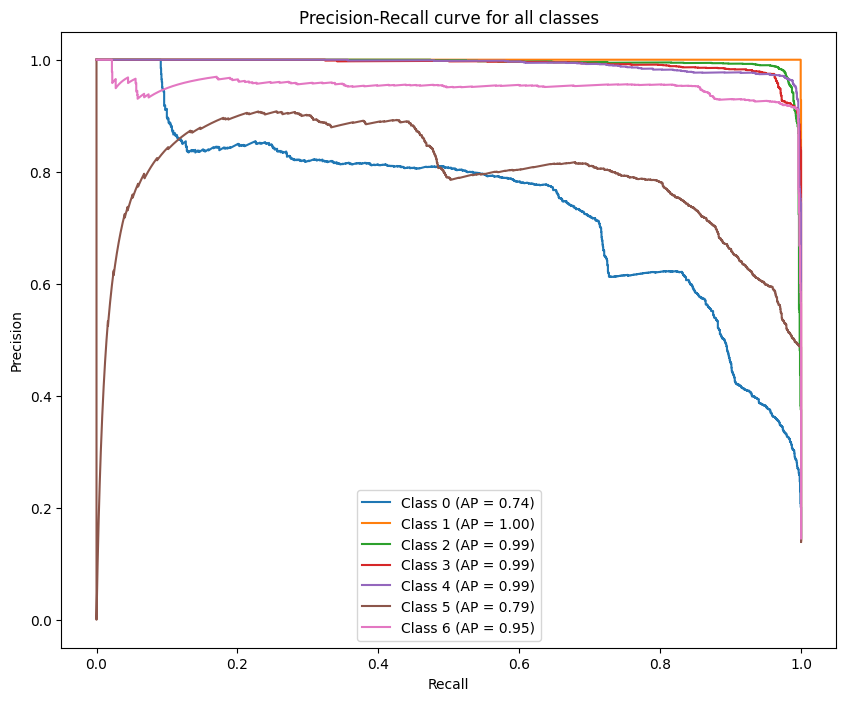

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
model_path = "models/logistic_regression_model.pkl"
import os
os.makedirs("models", exist_ok=True)

with open(model_path, "wb") as file:
    pickle.dump(logistic_regression_model, file)

print(f"Model saved to {model_path}")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

Model saved to models/logistic_regression_model.pkl


## K Nearest Neighbour


In [ ]:
k = np.sqrt(len(X_train)).astype(int)
k

181

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)


In [ ]:
knn_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=181)

In [ ]:
y_pred = knn_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.924059566659609


In [ ]:
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      2083
           1       0.99      1.00      1.00      2003
           2       0.95      0.97      0.96      2019
           3       0.92      0.96      0.94      1997
           4       0.96      1.00      0.98      2044
           5       0.83      1.00      0.91      1967
           6       0.88      1.00      0.93      2056

    accuracy                           0.92     14169
   macro avg       0.93      0.93      0.92     14169
weighted avg       0.93      0.92      0.92     14169



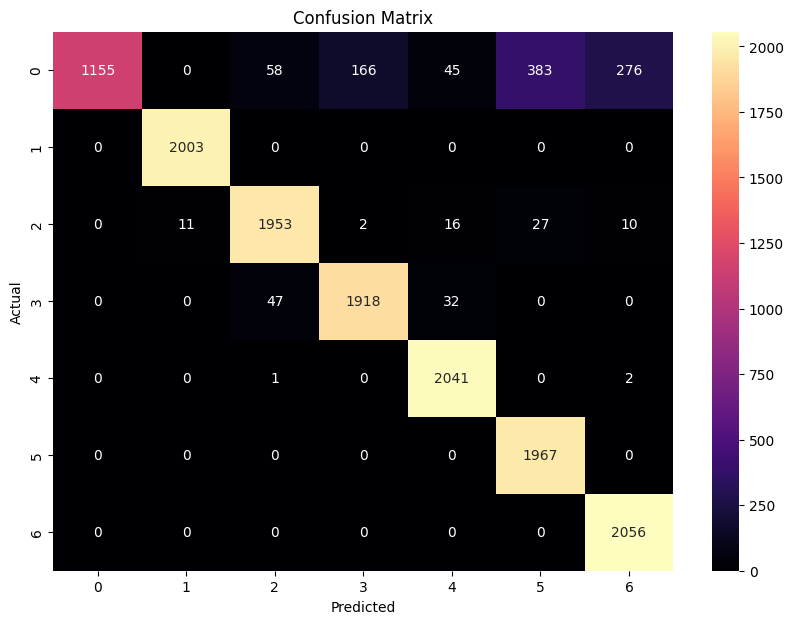

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_proba = knn_classifier.predict_proba(X_test)

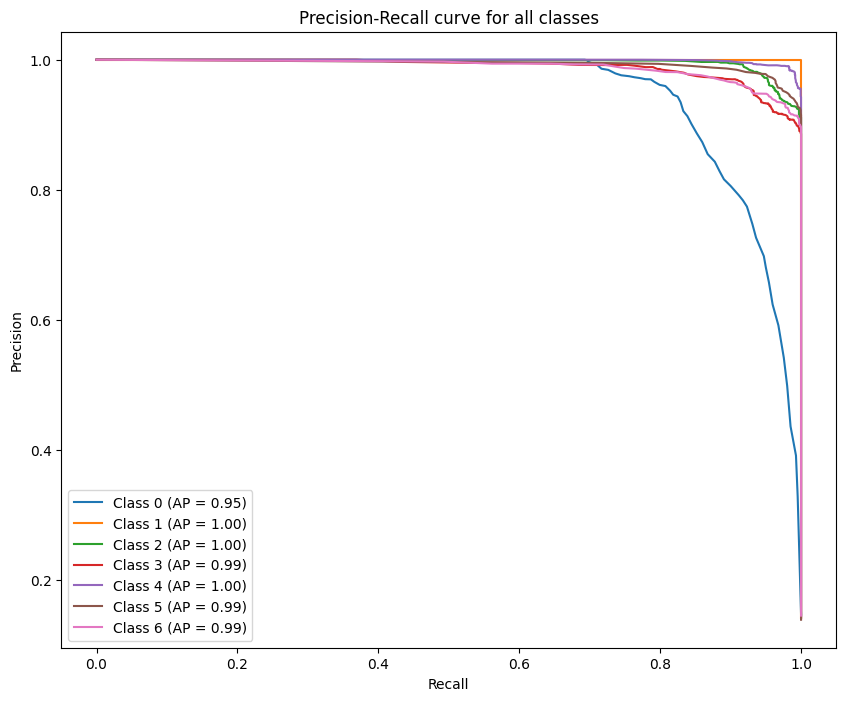

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
model_path = "models/knn_classifier.pkl"
import os
os.makedirs("models", exist_ok=True)

with open(model_path, "wb") as file:
    pickle.dump(knn_classifier, file)

print(f"Model saved to {model_path}")

# Load the model later
with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

Model saved to models/knn_classifier.pkl


## Naive Bayes


In [ ]:
gnb_classifier = GaussianNB()

In [ ]:
gnb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb_classifier.predict(X_test)
y_pred_proba = gnb_classifier.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8213705977838944


In [ ]:
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.59      2083
           1       1.00      1.00      1.00      2003
           2       0.87      0.75      0.81      2019
           3       0.86      0.91      0.88      1997
           4       0.78      0.97      0.87      2044
           5       0.62      0.80      0.70      1967
           6       0.90      0.86      0.88      2056

    accuracy                           0.82     14169
   macro avg       0.83      0.82      0.82     14169
weighted avg       0.83      0.82      0.82     14169



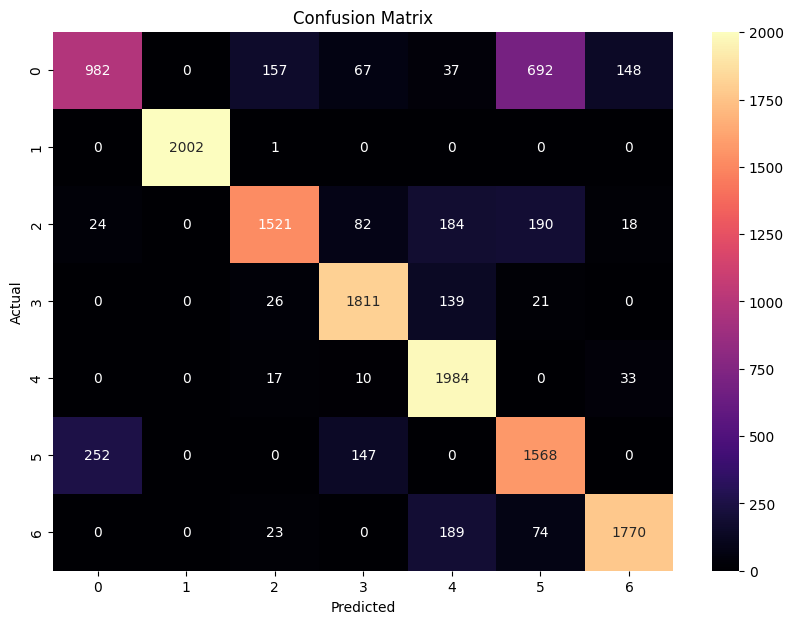

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

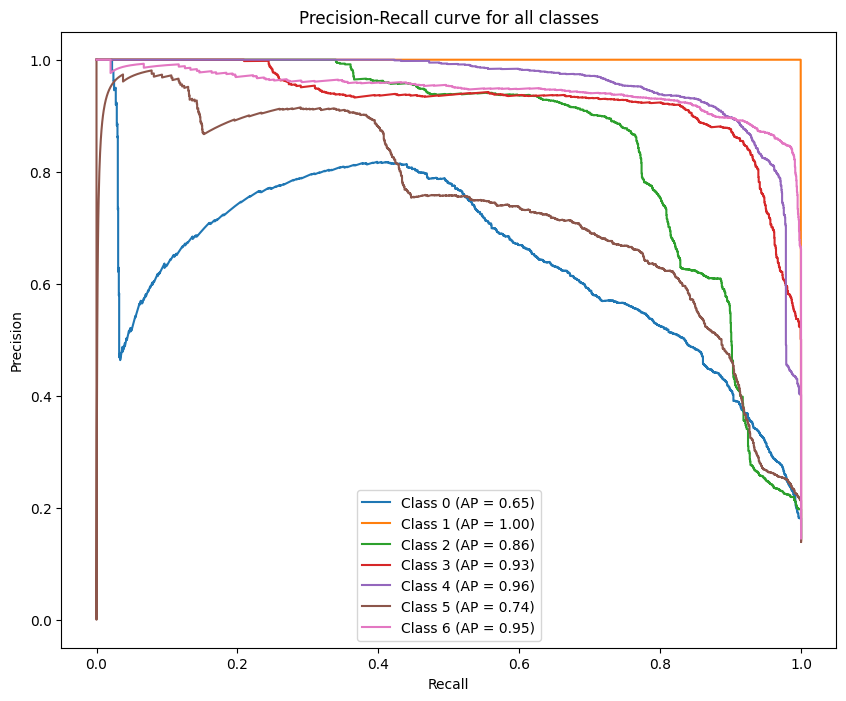

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
model_path = "models/gnb_classifier.pkl"
import os
os.makedirs("models", exist_ok=True)

with open(model_path, "wb") as file:
    pickle.dump(gnb_classifier, file)

print(f"Model saved to {model_path}")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

Model saved to models/gnb_classifier.pkl


## Decision Tree



In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)


In [ ]:
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
print("Performing grid search...")
grid_search.fit(X_train, y_train)

Performing grid search...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")


Best parameters found:
class_weight: balanced
criterion: entropy
max_depth: None
max_features: None
min_samples_leaf: 1
min_samples_split: 2


In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9951


In [ ]:
#k-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.99334543 0.99395039 0.99395039 0.99304295 0.99395039]
Average CV score: 0.9936 (+/- 0.0008)


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2083
           1       1.00      1.00      1.00      2003
           2       0.99      1.00      1.00      2019
           3       1.00      1.00      1.00      1997
           4       1.00      1.00      1.00      2044
           5       0.99      1.00      1.00      1967
           6       0.99      1.00      0.99      2056

    accuracy                           1.00     14169
   macro avg       1.00      1.00      1.00     14169
weighted avg       1.00      1.00      1.00     14169



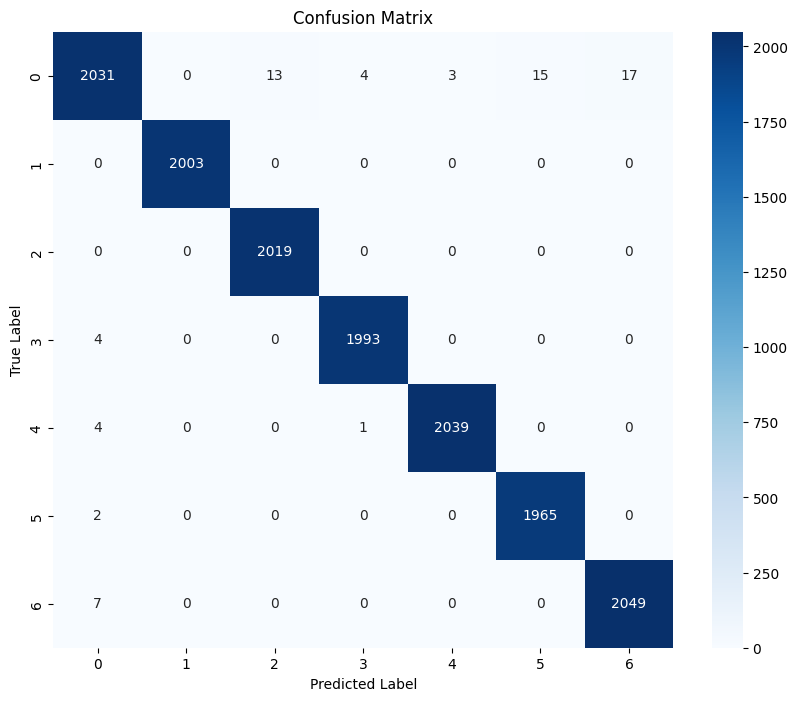

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

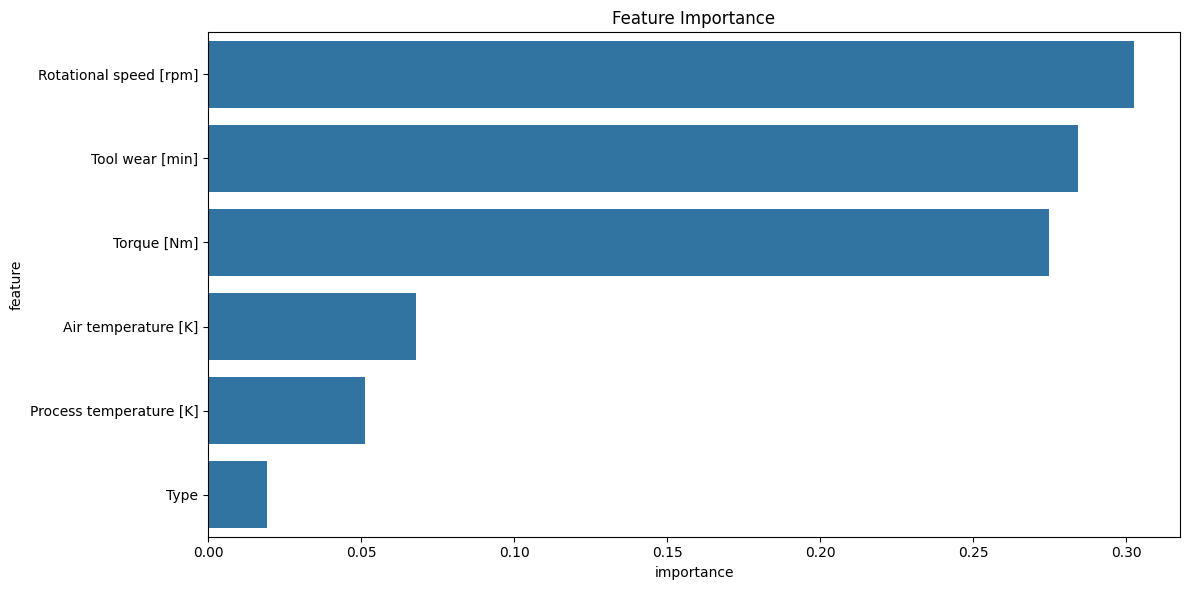

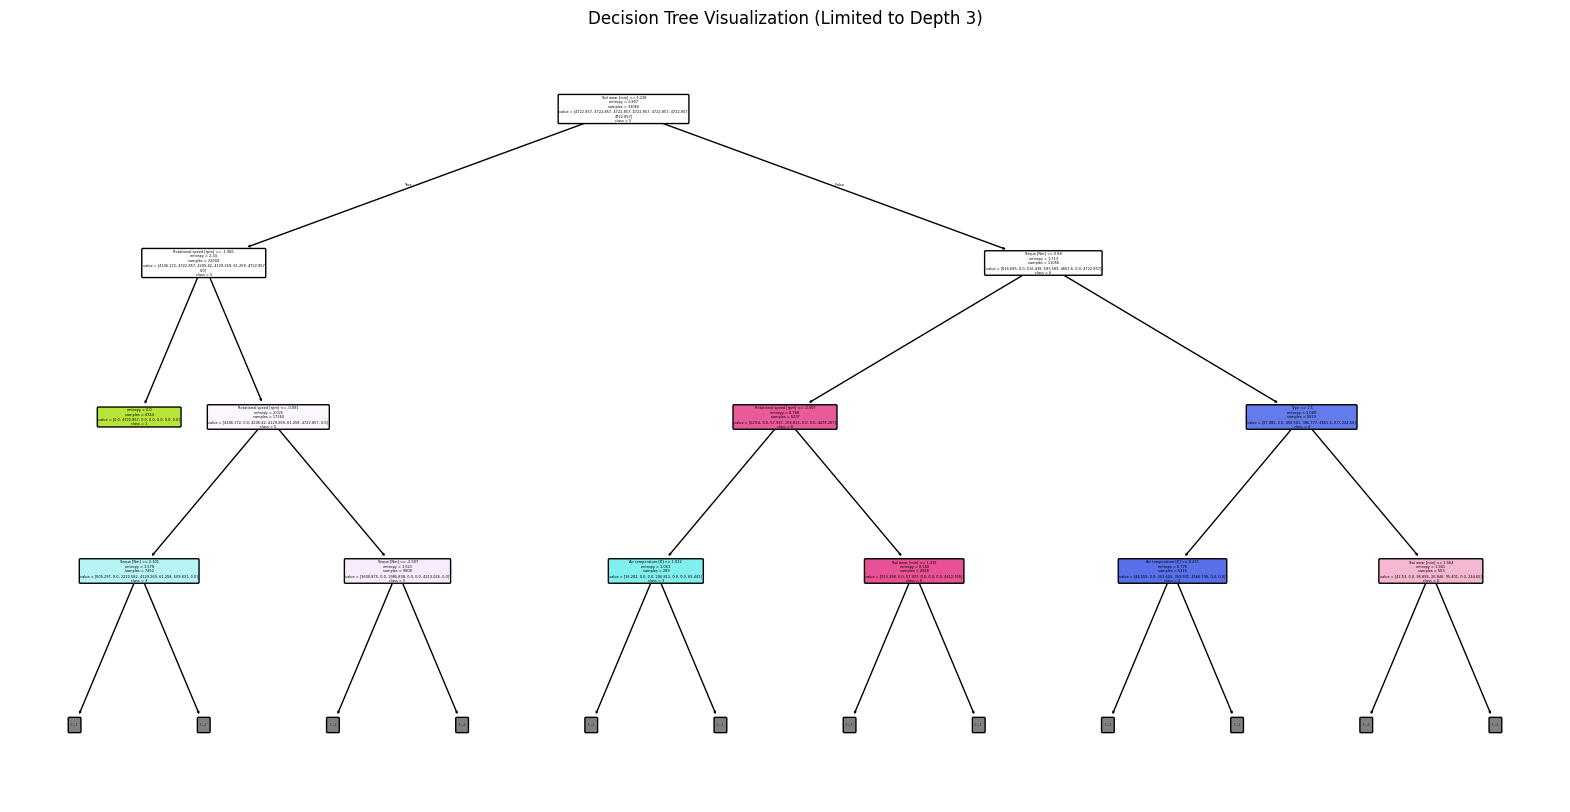

In [ ]:
# Feature importance visualization
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Visualize the decision tree (limited to max_depth=3 for visibility)
plt.figure(figsize=(20,10))
plot_tree(best_model, max_depth=3, feature_names=X_train.columns,
          class_names=[str(i) for i in range(7)], # 7 classes (0-6)
          filled=True, rounded=True)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)

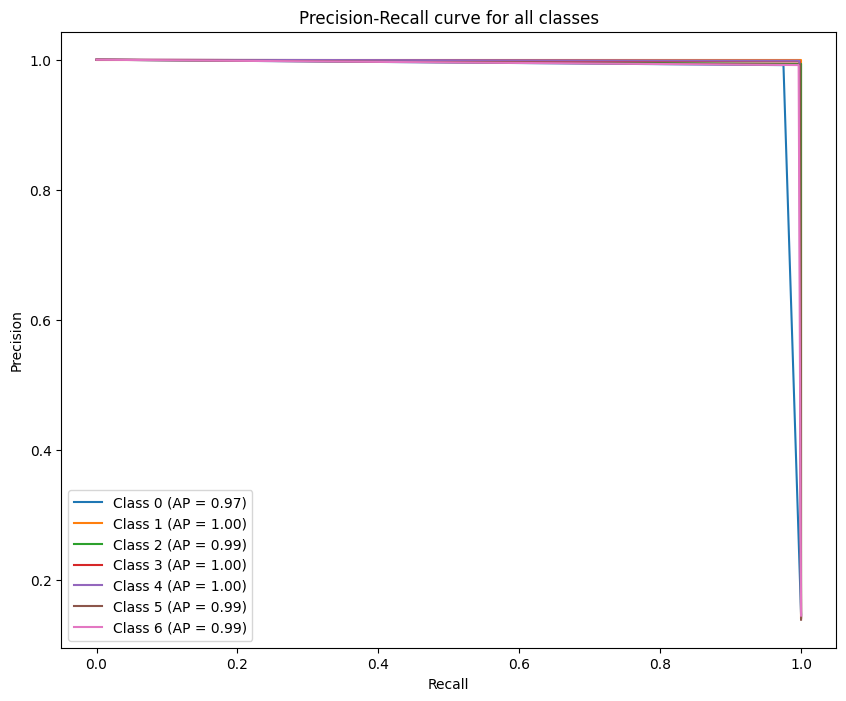

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
model_path = "models/dt_clf.pkl"
import os
os.makedirs("models", exist_ok=True)

with open(model_path, "wb") as file:
    pickle.dump(dt_clf, file)

print(f"Model saved to {model_path}")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

Model saved to models/dt_clf.pkl


## SVM

In [ ]:
svm_model = SVC(kernel='rbf', probability=True)

In [ ]:
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [ ]:
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9767097183993224


In [ ]:
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2083
           1       1.00      1.00      1.00      2003
           2       0.99      1.00      1.00      2019
           3       0.98      1.00      0.99      1997
           4       0.99      1.00      1.00      2044
           5       0.92      1.00      0.96      1967
           6       0.96      1.00      0.98      2056

    accuracy                           0.98     14169
   macro avg       0.98      0.98      0.98     14169
weighted avg       0.98      0.98      0.98     14169



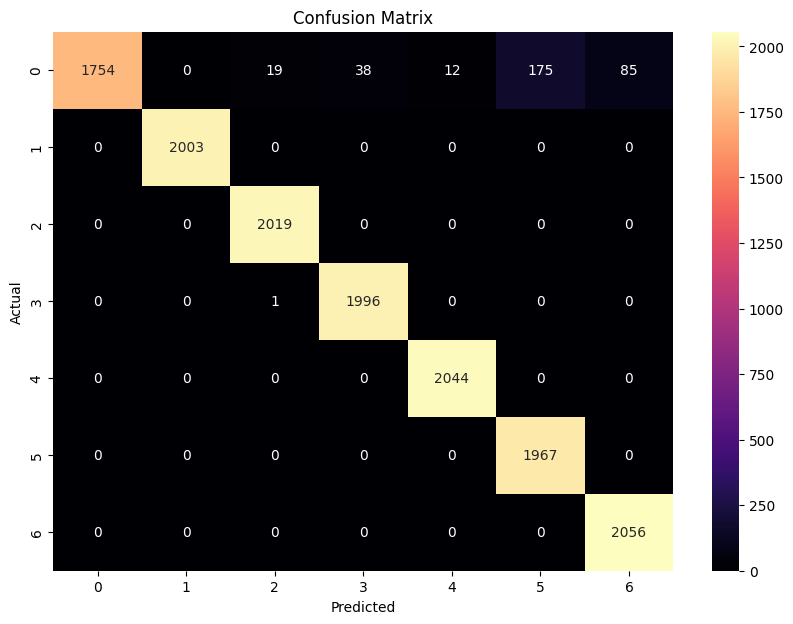

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

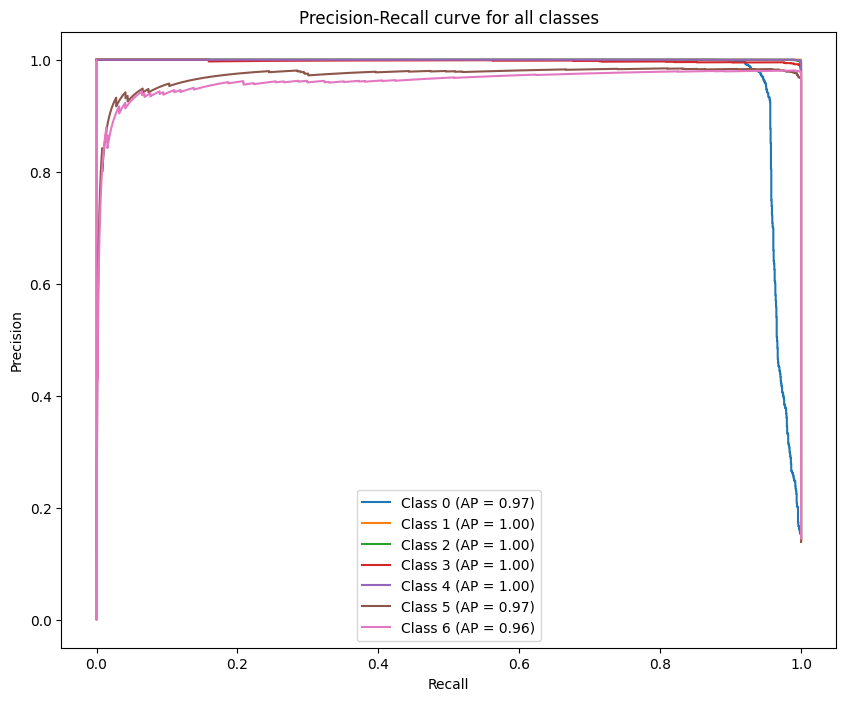

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

## Random forest

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
random_forest_model.fit(X_train, y_train.values.reshape(-1))

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test.values.reshape(-1), y_pred_rf)
print(f'Random Forest Training Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.9976709718399323


In [ ]:
class_report_rf = classification_report(y_test.values.reshape(-1), y_pred_rf)
print('Random Forest Classification Report:')
print(class_report_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2083
           1       1.00      1.00      1.00      2003
           2       1.00      1.00      1.00      2019
           3       1.00      1.00      1.00      1997
           4       1.00      1.00      1.00      2044
           5       1.00      1.00      1.00      1967
           6       0.99      1.00      1.00      2056

    accuracy                           1.00     14169
   macro avg       1.00      1.00      1.00     14169
weighted avg       1.00      1.00      1.00     14169



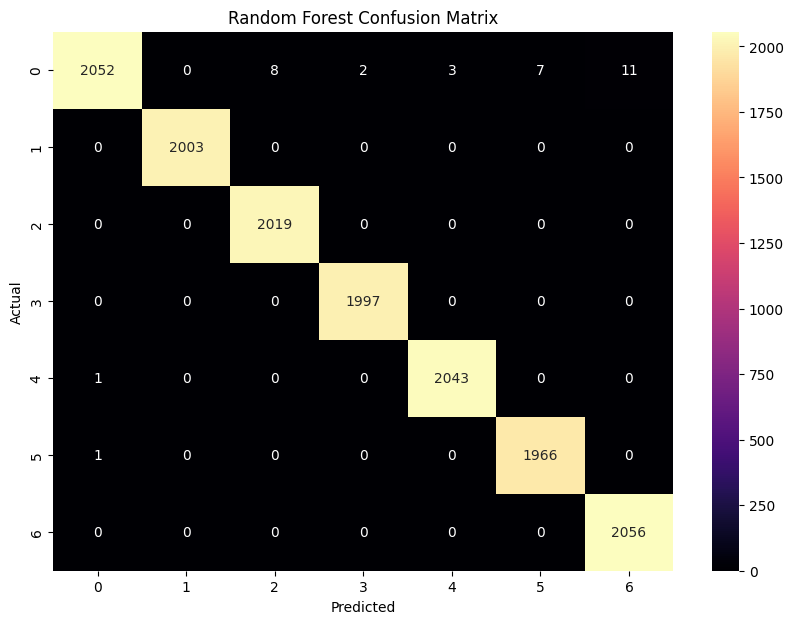

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
print(f"Prediction probabilities shape: {y_pred_proba_rf.shape}")

Prediction probabilities shape: (14169, 7)


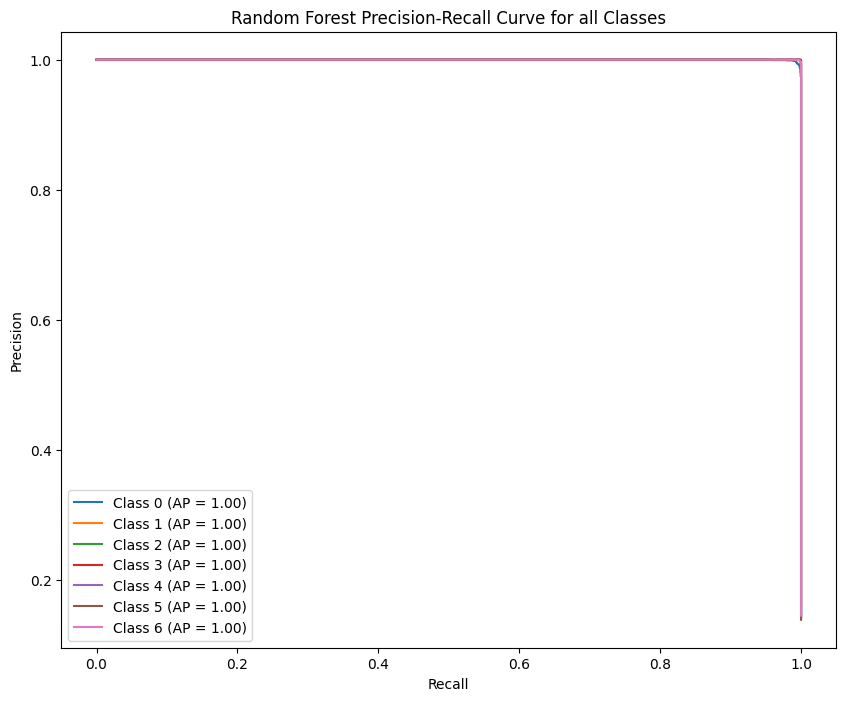

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(y_pred_proba_rf.shape[1]):
    precision_rf, recall_rf, _ = precision_recall_curve(y_test == i, y_pred_proba_rf[:, i])
    avg_precision_rf = average_precision_score(y_test == i, y_pred_proba_rf[:, i])
    plt.plot(recall_rf, precision_rf, label=f'Class {i} (AP = {avg_precision_rf:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve for all Classes')
plt.legend(loc='best')
plt.show()

In [ ]:
rf_model_path = "models/random_forest_model.pkl"
os.makedirs("models", exist_ok=True)

with open(rf_model_path, "wb") as file:
    pickle.dump(random_forest_model, file)

print(f"Random Forest model saved to {rf_model_path}")

# Load the Random Forest model
with open(rf_model_path, "rb") as file:
    loaded_rf_model = pickle.load(file)

Random Forest model saved to models/random_forest_model.pkl
Random Forest model loaded successfully.


In [ ]:
model_path = "models/svm_model.pkl"
import os
os.makedirs("models", exist_ok=True)

with open(model_path, "wb") as file:
    pickle.dump(svm_model, file)

print(f"Model saved to {model_path}")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

Model saved to models/svm_model.pkl


## Model Comparision

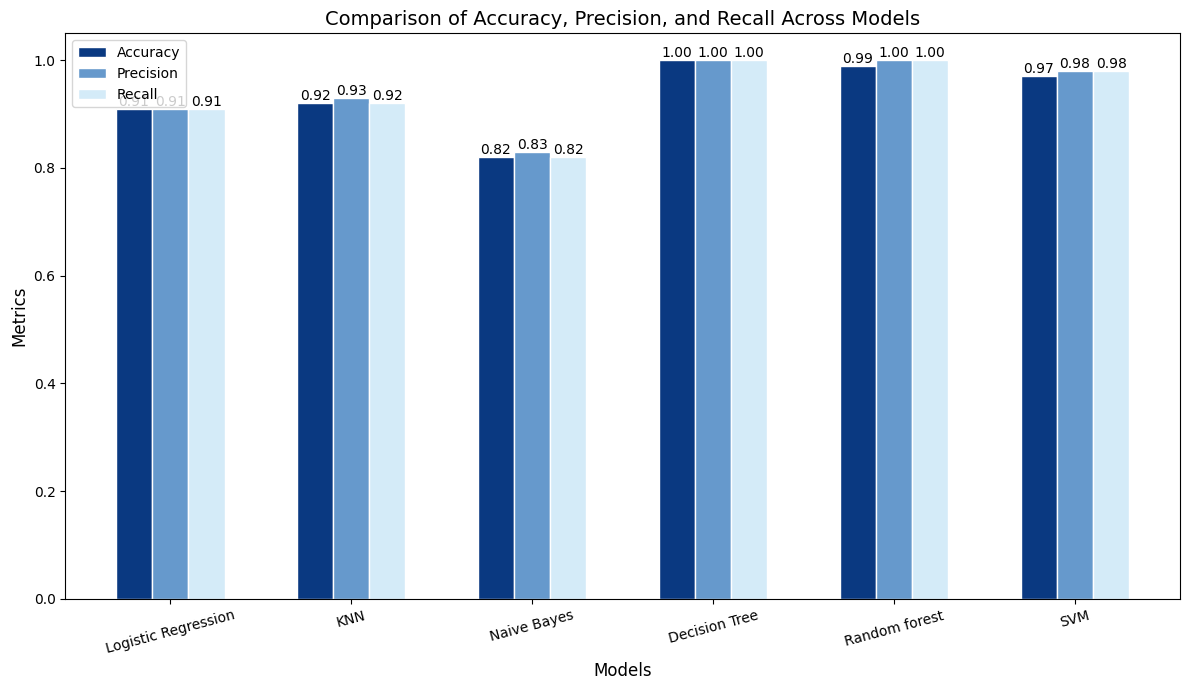

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the models
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree','Random forest', 'SVM']
accuracy = [0.91, 0.92, 0.82, 1.00, 0.99, 0.97]
precision = [0.91, 0.93, 0.83, 1.00,1.00, 0.98]
recall = [0.91, 0.92, 0.82, 1.00, 1.00, 0.98]

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the joint bar graph
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, accuracy, color='#0A3981', width=bar_width, edgecolor='white', label='Accuracy')
bars2 = plt.bar(r2, precision, color='#6699cc', width=bar_width, edgecolor='white', label='Precision')
bars3 = plt.bar(r3, recall, color='#D4EBF8', width=bar_width, edgecolor='white', label='Recall')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Accuracy, Precision, and Recall Across Models', fontsize=14)
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=15)
plt.legend()

# Adding values on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 91 - LogReg
# 92 - knn
# 82 - naive bayes
# 100 - decision tree
# 97 - SVM
# 99 - random forest